# Carbon Intensity Analysis - Group-2
## Objective:
To analyze carbon intensity (CI) data across sectors, regions, and value chain stages using the PCF-Database, identifying significant differences to help Global Trade Alliance reduce the environmental impact of their distributed products.

## Task Description:
As a sustainability data analyst at EcoFuture Analytics, your task is to analyze CI data from the PCF-Database to identify sectoral, regional, and value chain differences. Using statistical tests and visualizations, you will provide insights to Global Trade Alliance for developing policies to minimize their products' carbon footprint.


In [1]:
#import necessary packages for the objective
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

##### Read the source data to a pandas datafarme, inspect its key features and clean the data for further analysis

Dataset Preview:
         *PCF-ID  Year of reporting *Stage-level CO2e available  \
0  10056-1-2014               2014                         Yes   
1  10056-1-2015               2015                         Yes   
2  10222-1-2013               2013                         Yes   
3  10261-1-2017               2017                         Yes   
4  10261-2-2017               2017                         Yes   

                  Product name (and functional unit)  \
0                           Frosted Flakes(R) Cereal   
1  Frosted Flakes, 23 oz, produced in Lancaster, ...   
2                                       Office Chair   
3                             Multifunction Printers   
4                             Multifunction Printers   

                                      Product detail               Company  \
0  Frosted Flakes(R), 23 oz., Produced in Lancast...       Kellogg Company   
1                                             Cereal       Kellogg Company   
2             

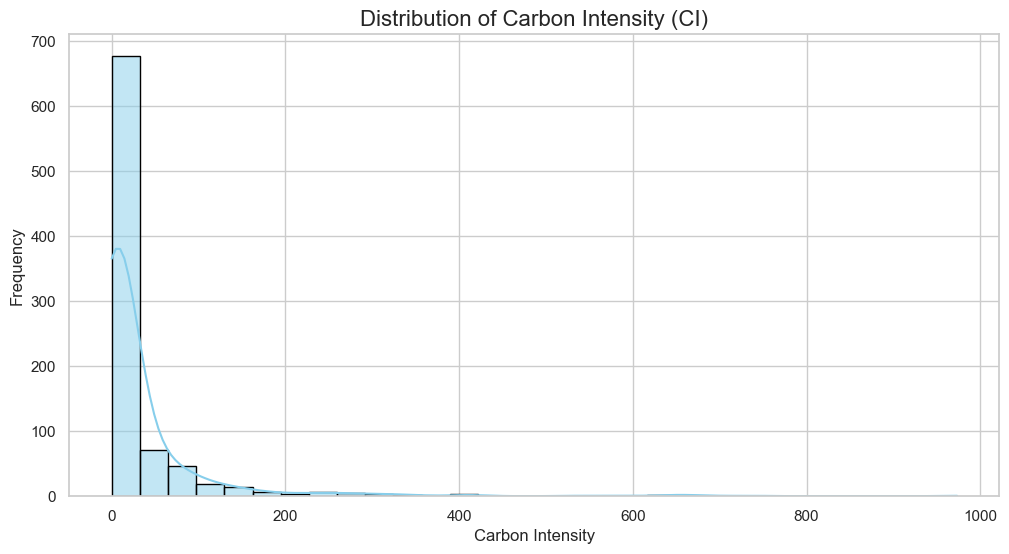


Sector Summary:
                       *Company's sector        mean   min     max  count
0              Automobiles & components   21.599867  0.99   84.36     75
1                             Chemicals    5.173017  0.12   94.00    116
2         Comm. equipm. & capital goods  106.041607  0.28  973.22     56
3                Computer, IT & telecom   75.294625  0.12  736.50    253
4   Construction & commercial materials    1.178955  0.21    6.51     67
5                       Food & Beverage    5.087266  0.11   74.64    139
6  Home durables, textiles, & equipment   13.283033  0.40  235.91    122
7          Packaging for consumer goods    1.276053  0.23    2.72     38


C:\Users\lucag\AppData\Local\Temp\ipykernel_20836\4259152168.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False),


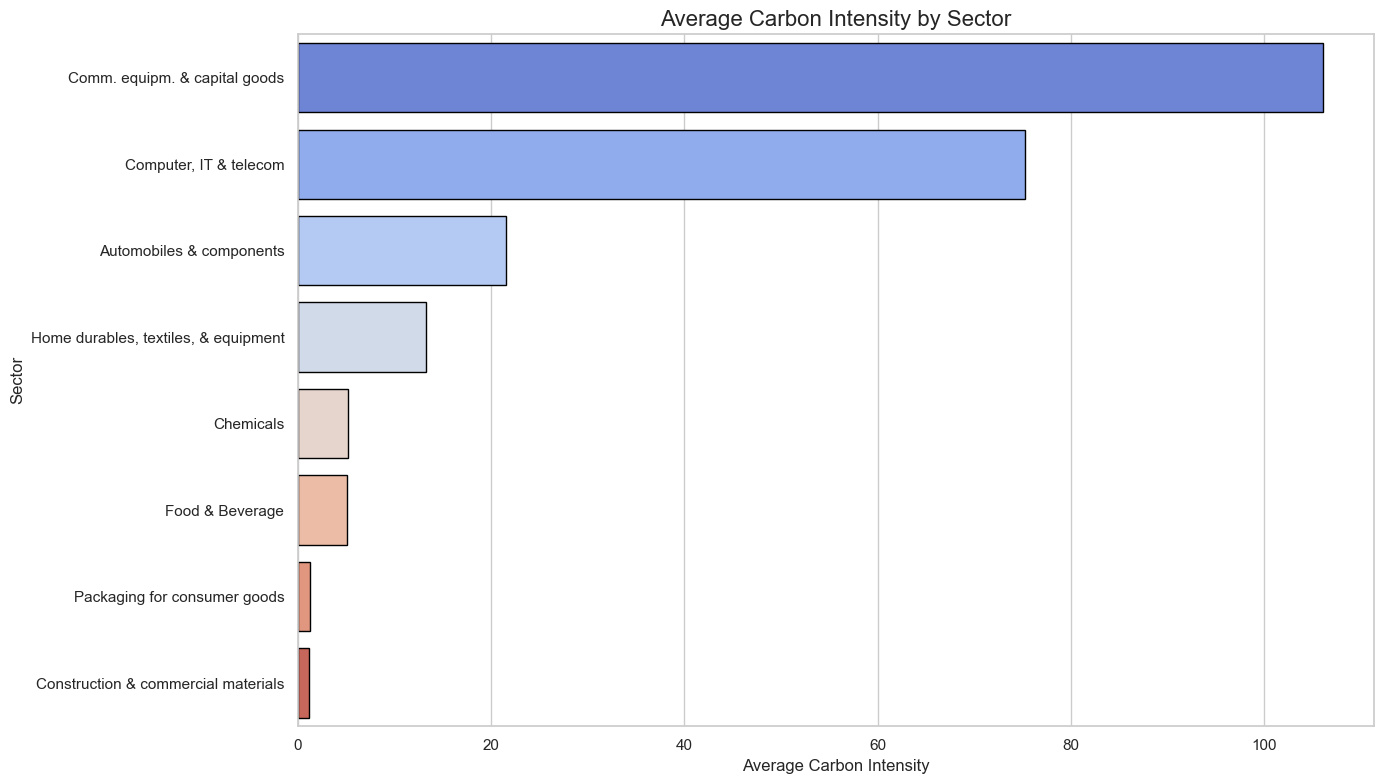


Country Summary:
    Country (where company is incorporated)  *Carbon intensity
0                                Australia          10.500000
1                                  Belgium           1.175000
2                                   Brazil         106.168235
3                                   Canada         370.148333
4                                    Chile           0.516667
5                                    China          44.586667
6                                 Colombia           0.175000
7                                  Finland           9.669714
8                                   France          60.863500
9                                  Germany          20.763582
10                                  Greece           0.700000
11                                   India           1.536250
12                               Indonesia           0.720000
13                                 Ireland           0.855000
14                                   Italy         

C:\Users\lucag\AppData\Local\Temp\ipykernel_20836\4259152168.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,


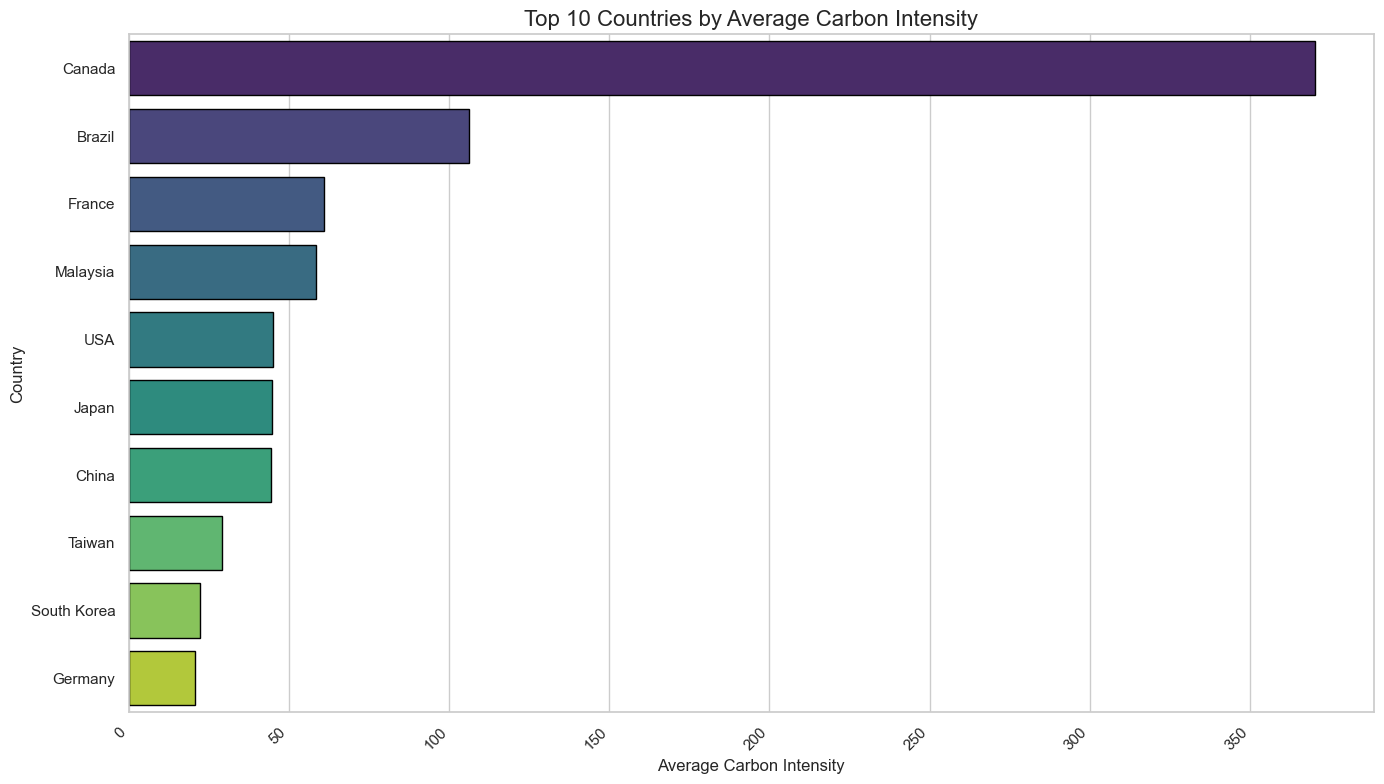

In [2]:
# Setting a Seaborn style
sns.set_theme(style="whitegrid", palette="pastel")  # Choose a clean and colorful theme

# Load the dataset
file_path = r'CarbonCatalogueDataDescriptor.xlsx'
sheet_name = 'Product Level Data'  # Replace with the actual sheet name
source_ci_df = pd.read_excel(file_path, sheet_name=sheet_name)

# Preview the first few rows of the dataset
print("Dataset Preview:\n", source_ci_df.head())

# Check for missing values
missing_values = source_ci_df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check data types
print("\nData Types:\n", source_ci_df.dtypes)

# Remove duplicates (if any)
source_ci_df = source_ci_df.drop_duplicates()

# Basic statistics
print("\nBasic Statistics:\n", source_ci_df.describe())

# Verify column names
print("\nColumn Names:\n", source_ci_df.columns)

# Explore unique values in key columns
if '*Company\'s sector' in source_ci_df.columns and '*Carbon intensity' in source_ci_df.columns:
    print("\nUnique Sectors:\n", source_ci_df['*Company\'s sector'].unique())
    print("\nUnique Countries:\n", source_ci_df['Country (where company is incorporated)'].unique())

    # Check the distribution of carbon intensity (CI)
    plt.figure(figsize=(12, 6))
    sns.histplot(source_ci_df['*Carbon intensity'].dropna(), kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title('Distribution of Carbon Intensity (CI)', fontsize=16)
    plt.xlabel('Carbon Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Group by sector and calculate average, min, and max CI
    sector_summary = source_ci_df.groupby('*Company\'s sector')['*Carbon intensity'].agg(['mean', 'min', 'max', 'count']).reset_index()
    print("\nSector Summary:\n", sector_summary)

    # Plot the average CI by sector
    plt.figure(figsize=(14, 8))
    sns.barplot(x='mean', y='*Company\'s sector', data=sector_summary.sort_values(by='mean', ascending=False), 
                palette='coolwarm', edgecolor="black")
    plt.title('Average Carbon Intensity by Sector', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Sector', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Group by country and calculate average CI
    country_summary = source_ci_df.groupby('Country (where company is incorporated)')['*Carbon intensity'].mean().reset_index()
    print("\nCountry Summary:\n", country_summary)

    # Plot the average CI by country (top 10 countries)
    top_countries = country_summary.sort_values(by='*Carbon intensity', ascending=False).head(10)
    plt.figure(figsize=(14, 8))
    sns.barplot(x='*Carbon intensity', y='Country (where company is incorporated)', data=top_countries,
                palette='viridis', edgecolor="black")
    plt.title('Top 10 Countries by Average Carbon Intensity', fontsize=16)
    plt.xlabel('Average Carbon Intensity', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in the dataset. Verify column names!")


### Part I: Comparing the carbon intensity across company's sectors
#### Objectives:
* Perform statistical analysis to find the significant differences in average carbon intensity (CI) among sectors.
* Find any sectors with overlapping CI ranges that make it difficult to distinguish their environmental performance.
* The possiblee reasons of the difference found.


In [3]:
####### Inspecting data########
display(source_ci_df.head())
display(source_ci_df.info())

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   *PCF-ID                                    866 non-null    object 
 1   Year of reporting                          866 non-null    int64  
 2   *Stage-level CO2e available                866 non-null    object 
 3   Product name (and functional unit)         866 non-null    object 
 4   Product detail                             856 non-null    object 
 5   Company                                    866 non-null    object 
 6   Country (where company is incorporated)    866 non-null    object 
 7   Company's GICS Industry Group              866 non-null    object 
 8   Company's GICS Industry                    866 non-null    object 
 9   *Company's sector                          866 non-null    object 
 10  Product weight (kg)       

None

In [4]:
#### Cleaning the dataframe ####

### Filtering limited columns that are relevant for the analysis ###
ci_df = source_ci_df[['*PCF-ID','Year of reporting','Product name (and functional unit)','Product detail','Company',"*Company's sector",'*Carbon intensity']]
ci_df = ci_df.dropna(subset=['*Carbon intensity'])
ci_df.columns = ci_df.columns.str.replace('*', '', regex=False)
ci_df = ci_df.rename(columns={"Company's sector": 'Company\'s sector'})
display(ci_df.head())

,PCF-ID,Year of reporting,Product name (and functional unit),Product detail,Company,Company's sector,Carbon intensity
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,Food & Beverage,2.67
1,10056-1-2015,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,Food & Beverage,2.67
2,10222-1-2013,2013,Office Chair,Field not included in 2013 data,KNOLL INC,Comm. equipm. & capital goods,3.51
3,10261-1-2017,2017,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.","Computer, IT & telecom",13.53
4,10261-2-2017,2017,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.","Computer, IT & telecom",16.53


##### Inspecting key features of compay's sectors

Number of Sectors: 8
['Food & Beverage' 'Comm. equipm. & capital goods'
 'Computer, IT & telecom' 'Chemicals'
 'Construction & commercial materials'
 'Home durables, textiles, & equipment' 'Packaging for consumer goods'
 'Automobiles & components']
-----------------------------------------------


Company's sector
Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Automobiles & components                 75
Construction & commercial materials      67
Comm. equipm. & capital goods            56
Packaging for consumer goods             38
Name: count, dtype: int64

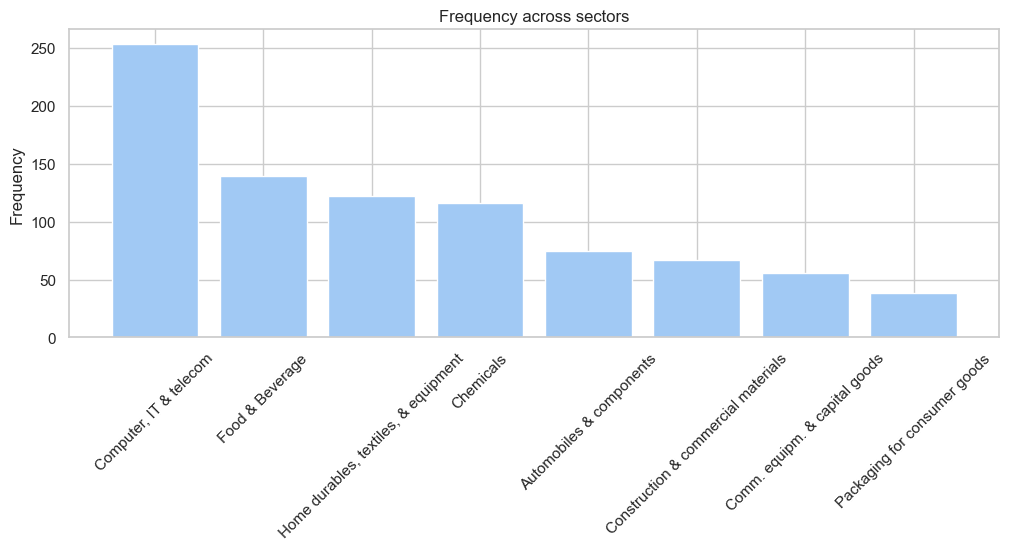

In [5]:
sectors = ci_df['Company\'s sector'].unique()
print(f"Number of Sectors: {len(sectors)}")
print(sectors)
print("-----------------------------------------------")
### ploting the frequency of entities across sectors ##
sector_counts = ci_df['Company\'s sector'].value_counts()
display(sector_counts)
plt.figure(figsize=(12, 4))
plt.bar(sector_counts.index, sector_counts.values)
plt.ylabel('Frequency')
plt.title('Frequency across sectors')
plt.xticks(rotation=45)
plt.show()

##### Plot the total carbon intensity across the sectors to understand which sector has the highest CI proportion.

C:\Users\lucag\AppData\Local\Temp\ipykernel_20836\1279268107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Company\'s sector', y='Carbon intensity', data=ci_df, inner='box', palette='coolwarm')


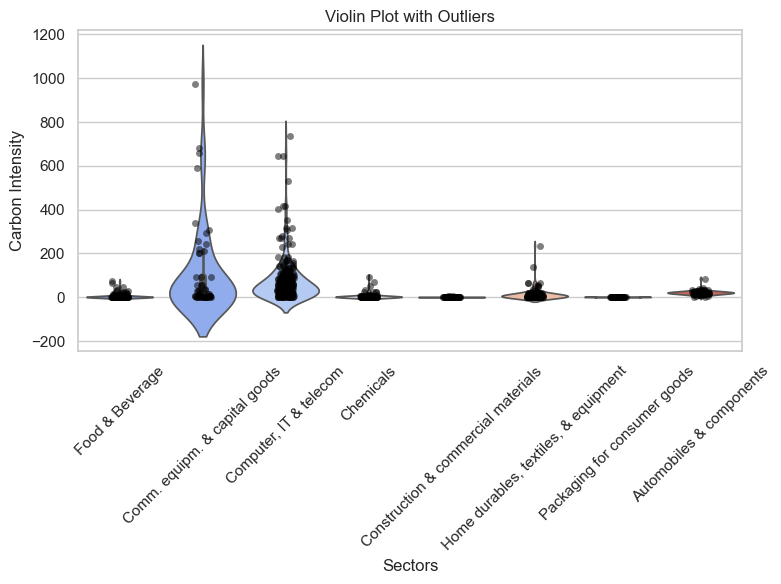

In [6]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Company\'s sector', y='Carbon intensity', data=ci_df, inner='box', palette='coolwarm')
sns.stripplot(x='Company\'s sector', y='Carbon intensity', data=ci_df, color='black', alpha=0.5, jitter=True)  # Overlay data points
plt.xlabel('Sectors')
plt.ylabel('Carbon Intensity')
plt.title('Violin Plot with Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Plot individual ci vs sector to understand how the values are distributed across each individual sector

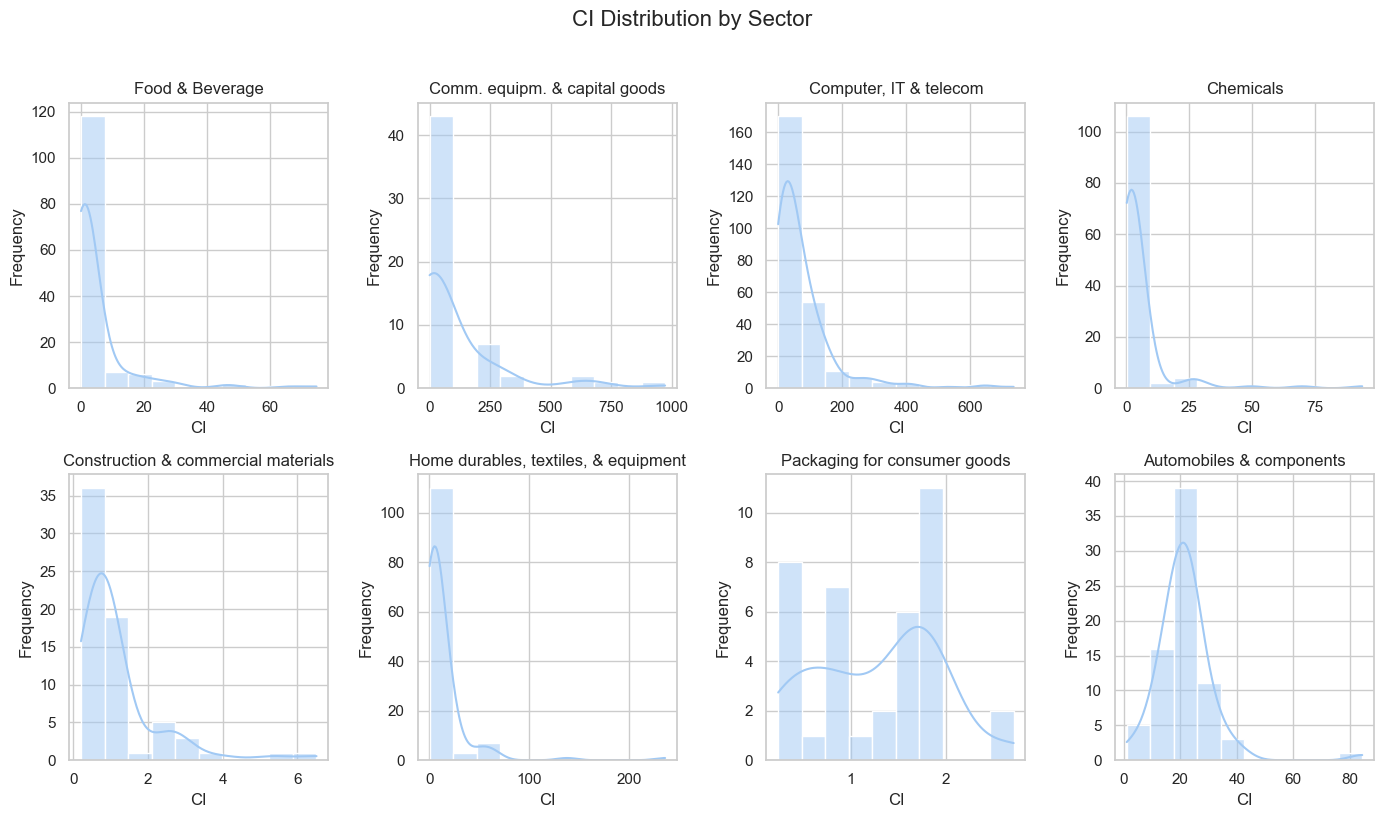

In [7]:
# Get unique sectors
sectors = ci_df['Company\'s sector'].unique()

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(14, 8), sharex=False, sharey=False)

for ax, sector in zip(axes.flatten(), sectors):
    sector_data = ci_df[ci_df['Company\'s sector'] == sector]
    sns.histplot(sector_data['Carbon intensity'], bins=10, kde=True, ax=ax)
    ax.set_title(f"{sector}")
    ax.set_xlabel('CI')
    ax.set_ylabel('Frequency')

fig.suptitle('CI Distribution by Sector', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [8]:
print(ci_df.describe())

       Year of reporting  Carbon intensity
count         866.000000        866.000000
mean         2014.762125         34.252968
std             1.236720         84.599082
min          2013.000000          0.110000
25%          2014.000000          1.320000
50%          2015.000000          5.400000
75%          2016.000000         26.000000
max          2017.000000        973.220000


##### Observations and conclusions:
* Significant differences in sample sizes are observed between sectors such as "Computer, IT & Telecom" and "Packaging for Consumer Goods."

* A violin plot comparison reveals considerable variance in carbon intensity (CI) distributions. Sectors like Food & Beverage, Communication Equipment & Capital Goods, Computer, IT & Telecom, and Chemicals exhibit pronounced tails and broader density ranges, indicating a substantial spread in CI values within these sectors, with extreme values visibly represented at the edges of the violins.

* The histogram plots illustrate the CI distribution across individual sectors. Upon examination, the distribution appears normal for some sectors; however, sectors such as Food & Beverage and Chemicals show a concentration of values skewed toward the lower end.'

#### Perform statistical analysis to find the significant differences in average carbon intensity (CI) among sectors

##### Performing ANOVA to understand the differences

In [9]:
groups = [ci_df[ci_df['Company\'s sector'] == group]['Carbon intensity'] for group in ci_df['Company\'s sector'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f'ANOVA result for CI: F-statistic = {f_stat}, p-value = {p_value}')
if p_value < 0.5:
    print('Significant differences found in CI accross Company sectors')

ANOVA result for CI: F-statistic = 26.818165245662108, p-value = 2.2201664774717847e-33
Significant differences found in CI accross Company sectors


##### Conclusion:
The ANOVA results for carbon intensity (CI), with an F-statistic of 26.82 and a p-value of 2.22e-33, indicate significant differences in CI across company sectors. This suggests that the sectors exhibit varying carbon intensity levels, likely influenced by industry-specific factors, operational practices, or resource usage.

Further Steps:
* Post-Hoc Testing: Conduct post-hoc pairwise comparisons (e.g., Tukey HSD test) to identify which specific sectors differ significantly in terms of CI.
* Sector Analysis: Investigate the underlying factors contributing to these differences by examining sector-specific practices, technologies, and sustainability initiatives.
* Visual Representation: Use additional visualizations, such as box plots or violin plots, to further illustrate the spread and distribution of CI values within each sector.

#### Performing post hoc testing with Tukey HSD group pair comparison

In [10]:
ci_tukey = pairwise_tukeyhsd(ci_df['Carbon intensity'], ci_df['Company\'s sector'])
print(ci_tukey.summary())

                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
               group1                               group2                 meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------------------------------
            Automobiles & components                            Chemicals  -16.4268  0.838   -51.066  18.2123  False
            Automobiles & components        Comm. equipm. & capital goods   84.4417    0.0    43.154 125.7295   True
            Automobiles & components               Computer, IT & telecom   53.6948    0.0   22.9581  84.4314   True
            Automobiles & components  Construction & commercial materials  -20.4209  0.763  -59.7204  18.8785  False
            Automobiles & components                      Food & Beverage  -16.5126 0.8087  -50.0075  16.9823  False
            Automobiles & components Home durables, textiles, & 

In [11]:
# convert the summary to a pondas dataframe 
ci_tukey_df = pd.DataFrame(data=ci_tukey._results_table.data[1:], columns=ci_tukey._results_table.data[0])
ci_df_sorted = ci_tukey_df.sort_values(by='meandiff', key=abs, ascending=False)
ci_df_sorted.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
14,Comm. equipm. & capital goods,Construction & commercial materials,-104.8627,0.0,-147.1910,-62.5343,True
17,Comm. equipm. & capital goods,Packaging for consumer goods,-104.7656,0.0,-153.9003,-55.6308,True
15,Comm. equipm. & capital goods,Food & Beverage,-100.9543,0.0,-137.9564,-63.9522,True
7,Chemicals,Comm. equipm. & capital goods,100.8686,0.0,62.8276,138.9096,True
16,Comm. equipm. & capital goods,"Home durables, textiles, & equipment",-92.7586,0.0,-130.4938,-55.0234,True


In [12]:
# Investigating the groups
duplicates = ci_df_sorted.duplicated(subset=['group1', 'group2']).sum()
print(f"Number of duplicates: {duplicates}")
print("Group1 and Group2")
display(ci_df_sorted['group1'].unique())
display(ci_df_sorted['group2'].unique())

Number of duplicates: 0
Group1 and Group2


array(['Comm. equipm. & capital goods', 'Chemicals',
       'Automobiles & components', 'Computer, IT & telecom',
       'Construction & commercial materials',
       'Home durables, textiles, & equipment', 'Food & Beverage'],
      dtype=object)

array(['Construction & commercial materials',
       'Packaging for consumer goods', 'Food & Beverage',
       'Comm. equipm. & capital goods',
       'Home durables, textiles, & equipment', 'Computer, IT & telecom',
       'Chemicals'], dtype=object)

##### Plotting the groups vs meandiff over a heat map to examine the differences.

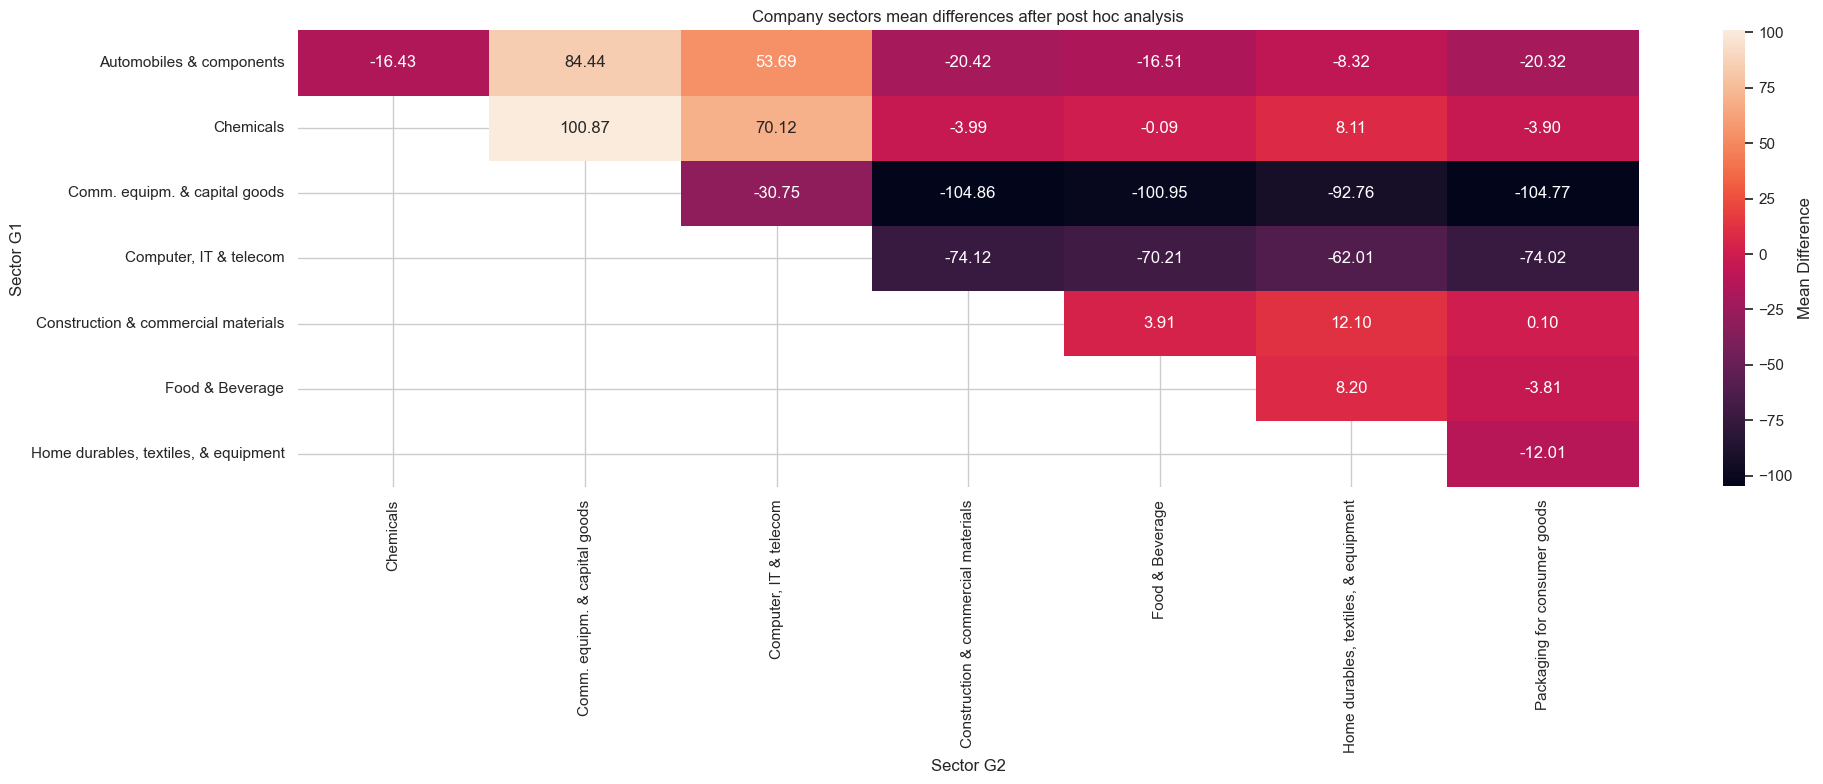

In [13]:
# Aggregate duplicates by mean
ci_df_sorted = ci_df_sorted.groupby(['group1', 'group2'], as_index=False).agg({'meandiff': 'mean'})
top_200 = ci_df_sorted.nlargest(200, 'meandiff', keep='all')
# Create a pivot table for the heatmap
heatmap_ci_data = ci_df_sorted.pivot(index='group1', columns='group2', values='meandiff')

plt.figure(figsize=(20, 8))
sns.heatmap(
    heatmap_ci_data, 
    annot=True, 
    fmt=".2f", 
    cbar_kws={'label': 'Mean Difference'}
)
plt.title('Company sectors mean differences after post hoc analysis')
plt.xlabel('Sector G2')
plt.ylabel('Sector G1')
plt.tight_layout()
plt.show()

### Conclusion:
The results from the Tukey HSD test and the corresponding heatmap highlight several significant pairwise differences in carbon intensity (CI) between sectors. Among these, the following sector pairs exhibit the highest CI differences, with values exceeding 90:

* Comm. Equipm. & Capital Goods → Construction & Commercial Materials = 104.86
* Comm. Equipm. & Capital Goods → Food & Beverage = 100.95
* Comm. Equipm. & Capital Goods → Home Durables, Textiles, & Equipment = 92.76
* Comm. Equipm. & Capital Goods → Packaging for Consumer Goods = 104.77
  
These values are marked by the same color (dark black) in the heatmap, indicating that these sector pairs have the most significant differences in their carbon intensity levels.

This suggests that sectors such as Comm. Equipm. & Capital Goods and Construction & Commercial Materials, Food & Beverage, and Packaging for Consumer Goods have considerable divergence in their environmental performance. The high CI differences could be attributed to industry-specific factors such as production methods, energy usage, and supply chain practices.

#### Sectors with Overlapping CI Ranges:
* Comm. Equipm. & Capital Goods and Packaging for Consumer Goods: The CI difference between these two sectors is relatively small (104.77) compared to others. This suggests that their CI ranges may overlap significantly, making it challenging to distinguish their carbon intensity levels based purely on the heatmap visualization.
* Comm. Equipm. & Capital Goods and Home Durables, Textiles, & Equipment: With a CI difference of 92.76, these sectors also exhibit a degree of overlap in their CI values, indicating that they might have similar environmental performance in terms of carbon intensity.


### Implications:
* Environmental Impact: The substantial differences in CI between these sectors emphasize the need for tailored sustainability strategies and interventions. Sectors with high CI values, such as Food & Beverage and Packaging for Consumer Goods, may require more stringent measures to reduce their environmental impact.  
* Further Analysis: The similar color patterns in the heatmap suggest that sectors like Comm. Equipm. & Capital Goods and Construction & Commercial Materials exhibit particularly high variability, warranting deeper exploration of their production processes, technologies, and resource usage to understand the root causes of these differences.


### Possible Reasons for the Differences in Carbon Intensity (CI):
* Energy Usage: Sectors like Food & Beverage and Chemicals are more energy-intensive, leading to higher CI, while sectors like IT & Telecom and Packaging for Consumer Goods use less energy.

* Technology & Efficiency: Sectors with advanced technologies and energy-efficient systems (e.g., Comm. Equipm. & Capital Goods) tend to have lower CI.

* Regulation & Sustainability: Stricter environmental regulations in some sectors promote lower CI, whereas others, like Food & Beverage, may lack such incentives.

* Waste Management: Sectors with poor waste management and high waste generation often show higher CI, whereas those with better recycling systems show lower CI.

* Geography: CI is influenced by the region’s energy mix, with areas relying on fossil fuels having higher CI values.

### Part II: Comparing the carbon intensity across countries/country-groups

#### Objectives: 

- Calculate the average CI with respect to all countries, or group countries in a logical way if neccesary 
- examine if the assumptions for statistical tests hold true (e.g. normal distribution for ANOVA)
- conduct statistical test to find out whether there are significant differences between countries/groups of countries 
- formulate hypothesis regarding the reasons for differences if any 


##### Step one: Loading and checking the data set
- **Objective:** Load the first sheet of the dataset and perform basic quality checks.
- **Steps:**
  1. Load the first worksheet into a DataFrame using `pandas`.
  2. Display an overview of the dataset (first few rows, data types, missing values, unique values, summary statistics).
- **Purpose:** Ensure the dataset is ready for analysis and identify any immediate issues like missing data or unexpected values.

In [14]:

# Load the Excel file
file_path = "CarbonCatalogueDataDescriptor.xlsx"
data = pd.ExcelFile(file_path)

# Load the first sheet into a DataFrame
main_data = data.parse(data.sheet_names[0])  # Load only the first sheet

# Display the first few rows
print("Preview of the first few rows of the dataset:")
display(main_data.head())


Preview of the first few rows of the dataset:


,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


##### Step two: Understanding the distribution of values across countries
- **Objective:** Determine the unique countries in the dataset and visualize the number of entries per country.
- **Steps:**
  1. Use `value_counts()` to count occurrences of each unique country in the `Country` column.
  2. Display the counts for clarity.
  3. Create a bar plot to visualize the frequency of entries for each country.
- **Purpose:** Understand the geographic distribution of the data, which can help identify any imbalances or regional trends.




Number of unique countries and their respective counts:


Country (where company is incorporated)
USA               305
Japan             110
Germany            67
Taiwan             60
Netherlands        35
Finland            35
United Kingdom     32
Switzerland        28
Sweden             26
Italy              23
South Korea        22
France             20
Brazil             17
India              16
Spain              13
South Africa       11
Belgium             8
China               6
Canada              6
Ireland             6
Australia           6
Malaysia            4
Chile               3
Colombia            2
Luxembourg          2
Lithuania           1
Indonesia           1
Greece              1
Name: count, dtype: int64

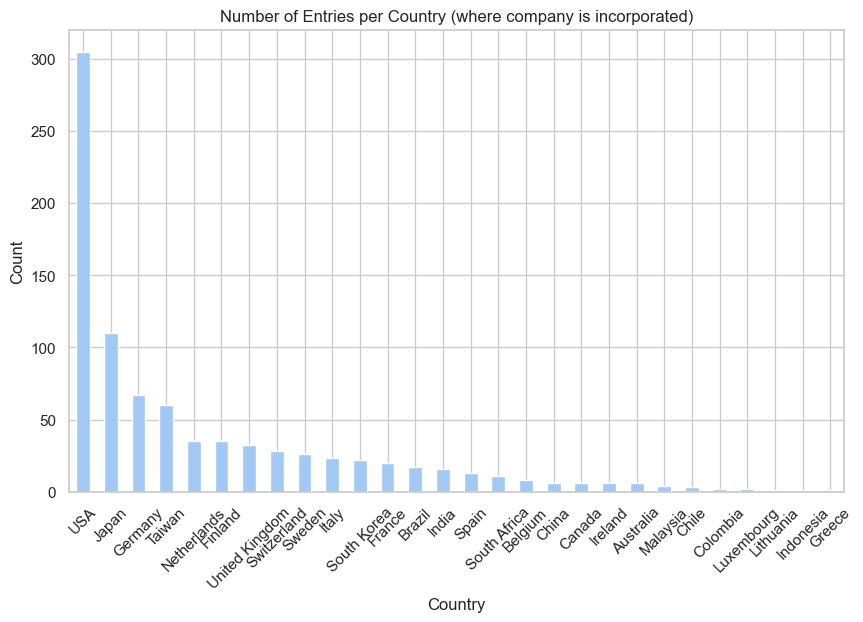

In [15]:
# Identify unique countries and their counts
print("Number of unique countries and their respective counts:")
country_counts = main_data['Country (where company is incorporated)'].value_counts()
display(country_counts)

# Plot the counts as a bar plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Entries per Country (where company is incorporated)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### Interpretation: 

- One can already see that we will run into issues when using statistical test like ANOVA, since the distribution between is very uneven. While USA, Japan, Germany and Taiwan have a lot of values. However, Greece, Indonesia and others have only few values.
- We could drop all countries with less than 30 values, but that would shrink the information density in the data set. A better alternative would be to group the countries logically. 
- Since we do not know where the clients of EcoFuture Analytics are situated, we can not really estimate which countries are most imporant with respect to our clients. One could assume that most clients will be situated in the biggest economies in the dataset (USA, Japan, Germany) and all other countries will be "slightly" less important. 
- Therefore we could build groups of countries, if they have less than 30 values by allocating them to their respective geographic reason.

### Step three: Building bigger groups
- **Objective:** Group countries with fewer than 30 entries into regional categories (e.g., "Europe Others") while preserving countries with 30 or more entries.
- **Steps:**
  1. Map each country to a continent using a predefined dictionary.
  2. Countries with fewer than 30 entries are assigned to their continent-specific "Others" group.
  3. Display the new distribution and visualize it in a bar plot.
- **Purpose:** Ensure statistically meaningful group sizes for ANOVA, while maintaining logical geographic groupings.



New group distribution:


Grouped Country
USA                     305
Japan                   110
Europe Others            74
Germany                  67
Taiwan                   60
Asia Others              49
Netherlands              35
Finland                  35
United Kingdom           32
Switzerland              28
Sweden                   26
South America Others     22
Africa Others            11
North America Others      6
Oceania Others            6
Name: count, dtype: int64

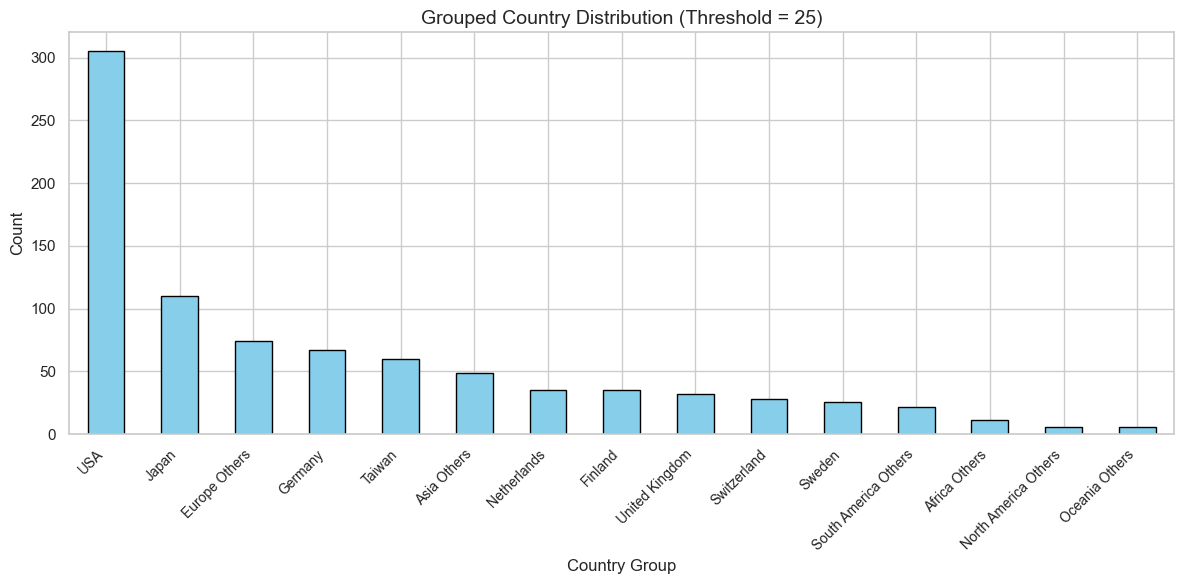

In [16]:
# Define the threshold for grouping
threshold = 25

# Define a mapping for countries to continents
continent_mapping = {
    'USA': 'North America',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'Taiwan': 'Asia',
    'Netherlands': 'Europe',
    'Finland': 'Europe',
    'United Kingdom': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Italy': 'Europe',
    'South Korea': 'Asia',
    'France': 'Europe',
    'Brazil': 'South America',
    'India': 'Asia',
    'Spain': 'Europe',
    'South Africa': 'Africa',
    'Belgium': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Ireland': 'Europe',
    'Australia': 'Oceania',
    'Malaysia': 'Asia',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Luxembourg': 'Europe',
    'Lithuania': 'Europe',
    'Indonesia': 'Asia',
    'Greece': 'Europe'
}

# Create a new column with grouped countries
def group_countries(country):
    count = country_counts.get(country, 0)
    if count >= threshold:
        return country
    else:
        continent = continent_mapping.get(country, 'Other')
        return f"{continent} Others"

main_data['Grouped Country'] = main_data['Country (where company is incorporated)'].apply(group_countries)

# Verify the new group distribution
print("New group distribution:")
group_distribution = main_data['Grouped Country'].value_counts()
display(group_distribution)

# Plot the new group distribution with adjusted label alignment
plt.figure(figsize=(12, 6))
group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Grouped Country Distribution (Threshold = 25)', fontsize=14)
plt.xlabel('Country Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



##### Interpretation 

- This approach creates bigger groups.
- Still some groups are very small. When interpretating the results in the end, we should be aware, that those groups are to small in terms of values. So interpretation with respect to those groups will be limited

#### Step four: Checking core assumptions for statistical tests like ANOVA
- **Objective:** Assess the data properties for statistical tests related to the `Carbon intensity` column.
- **Steps:**
  1. **Boxplots:** Visualize the distribution of `Carbon intensity` for each group to check for similar variance and normality.
  2. **Residuals:**
     - Calculate residuals by subtracting the overall mean from each observation in `Carbon intensity`.
     - Plot a histogram of these residuals to check for the normality of the entire model.
  3. **Group Residuals:**
     - Group the residuals by country and plot histograms side by side to assess the normality within each group.
- **Purpose:** Ensure the data meets the assumptions for statistical tests such as ANOVA, including similar variances and normality of residuals.


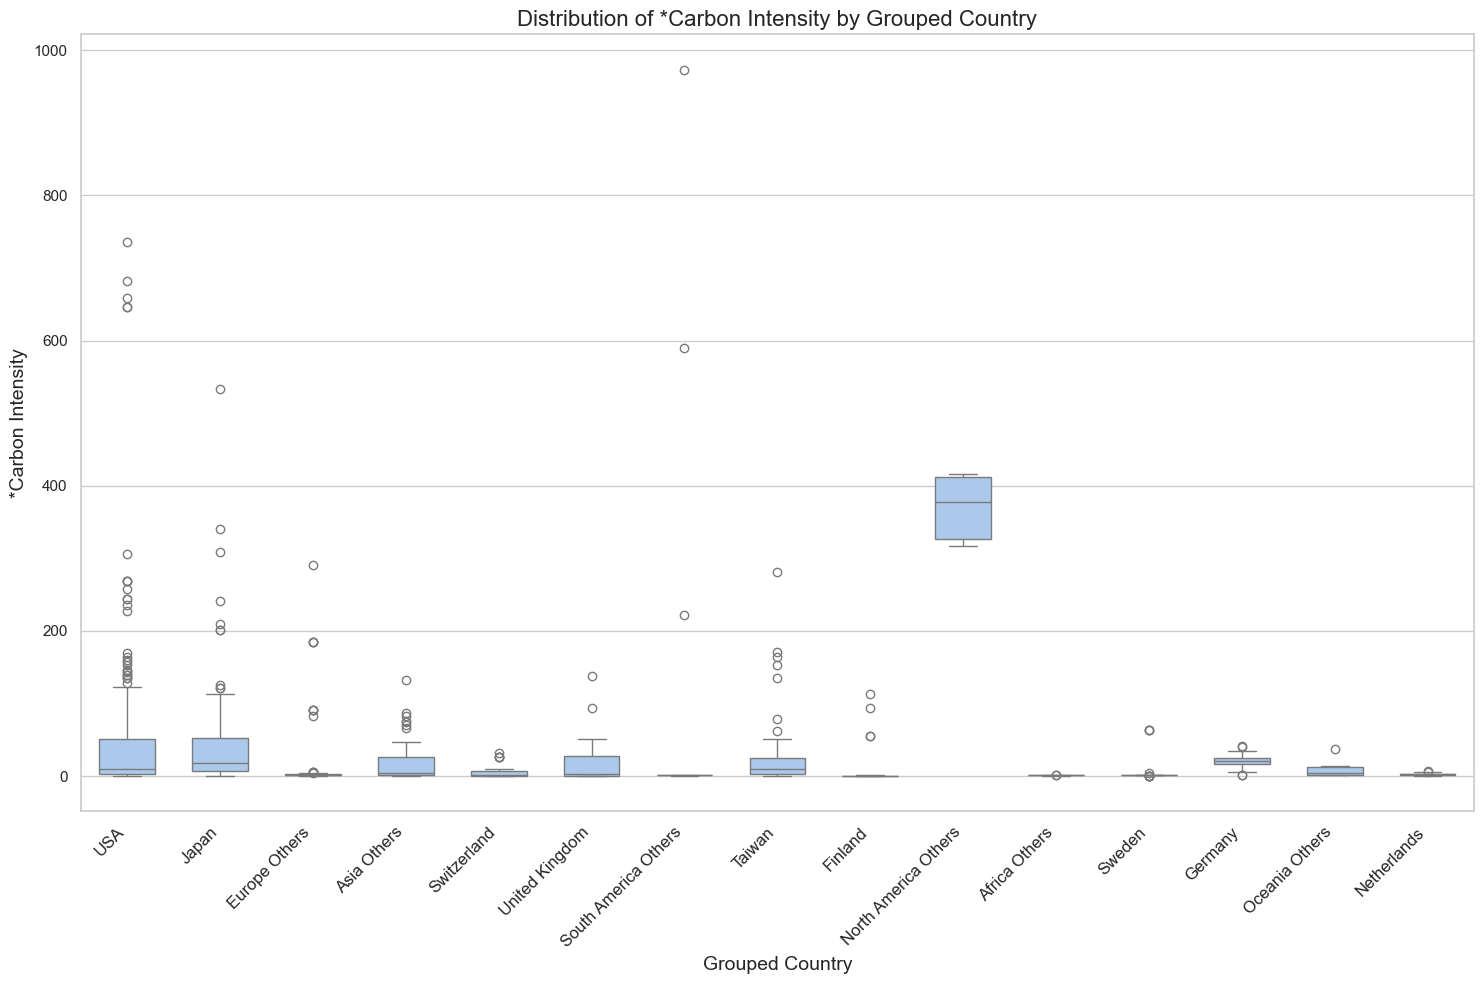

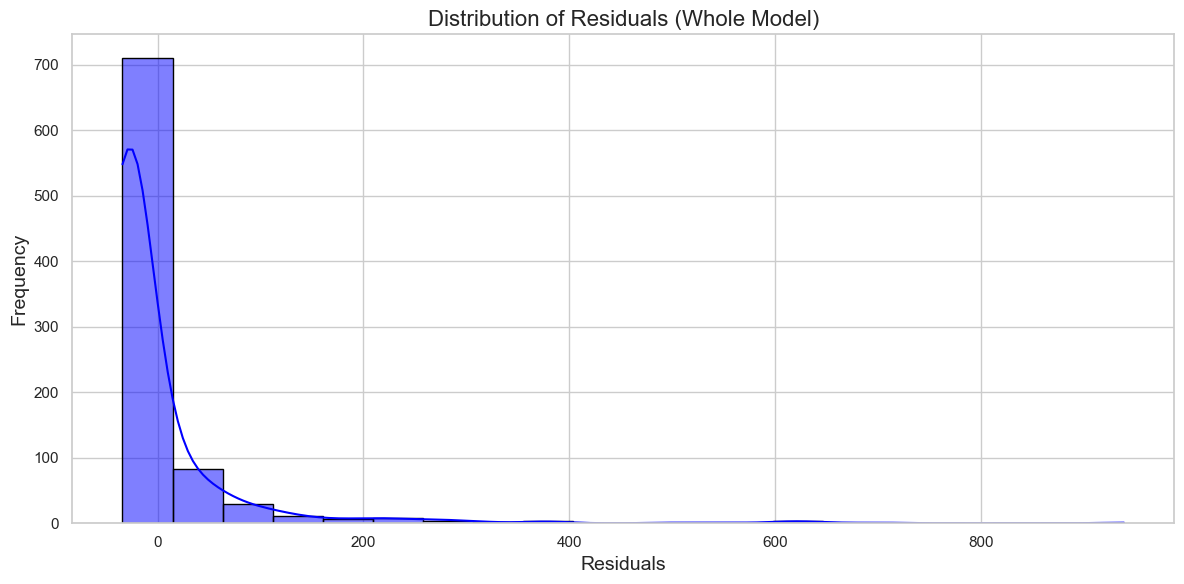

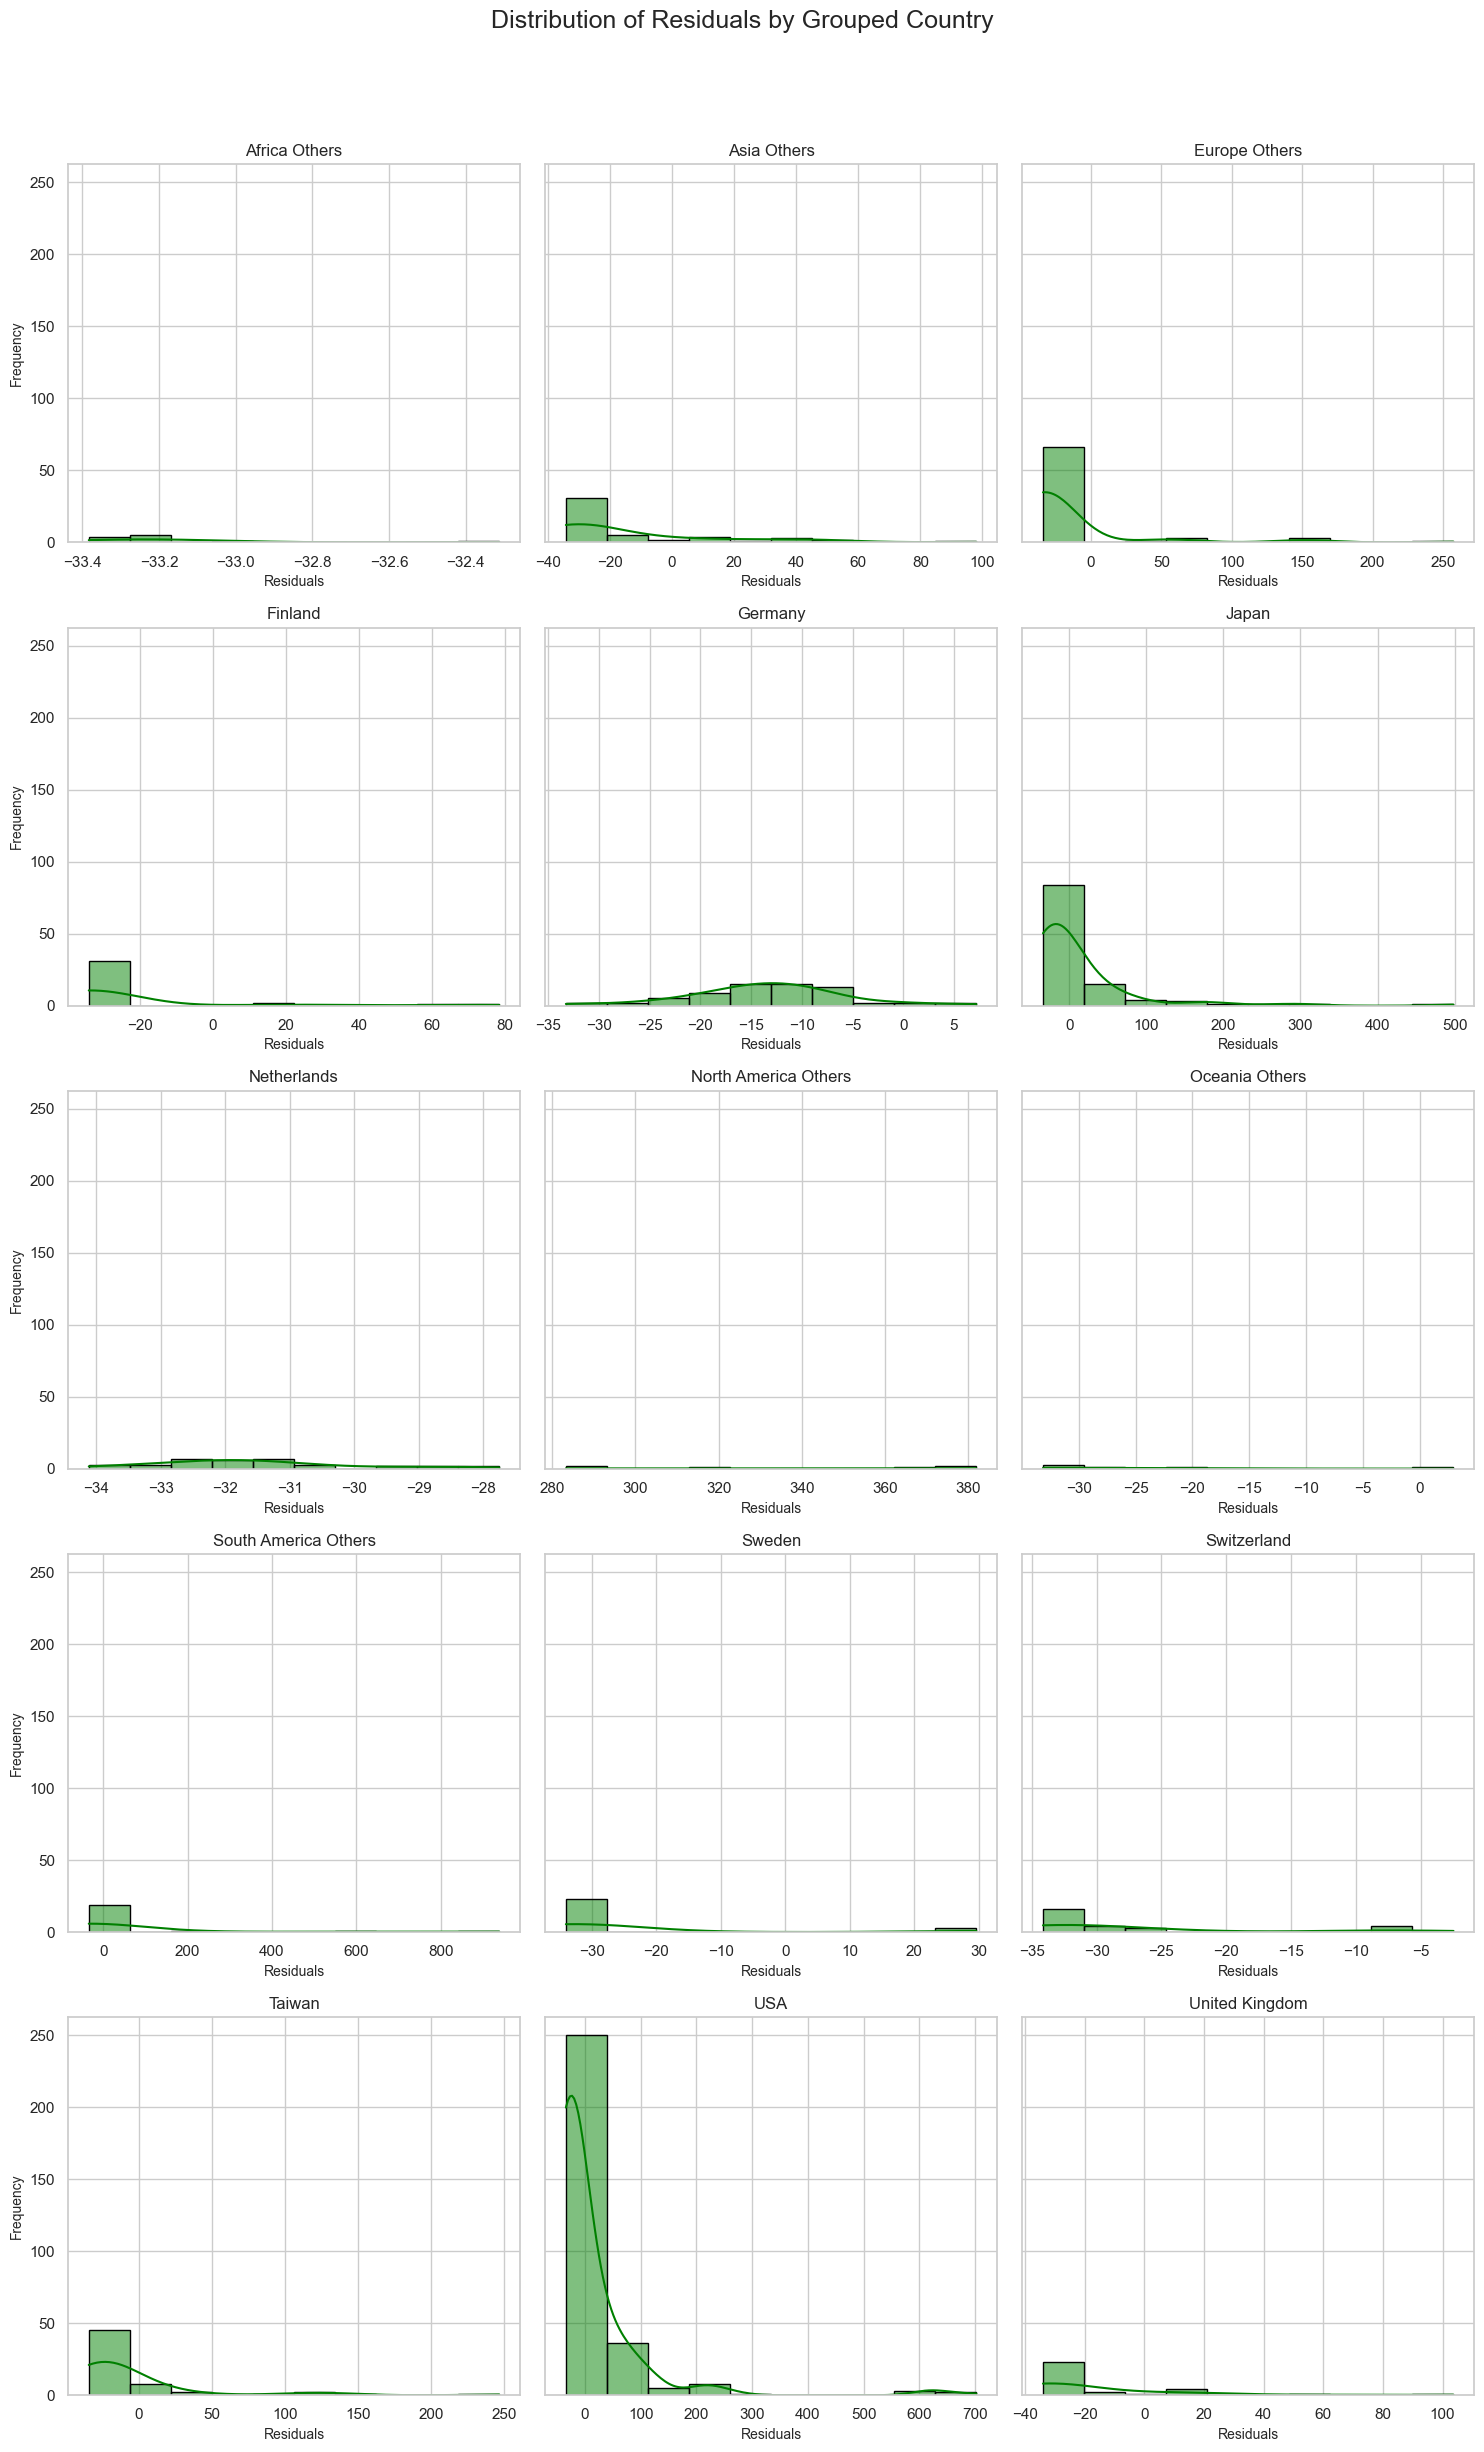

Summary table of each group's statistics:


,Grouped Country,mean,variance,std_dev
0,Africa Others,1.106364,0.084665,0.290973
1,Asia Others,20.764490,919.639421,30.325557
2,Europe Others,17.612838,2699.850903,51.960090
3,Finland,9.669714,716.462068,26.766809
4,Germany,20.763582,58.250648,7.632211
5,Japan,44.831364,5813.141783,76.243962
6,Netherlands,2.706571,2.529206,1.590348
7,North America Others,370.148333,2193.847657,46.838527
8,Oceania Others,10.500000,198.753560,14.097998
9,South America Others,82.125455,56941.583626,238.624357


In [17]:
# Check if the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Boxplot: Distribution of Carbon Intensity for each group
    plt.figure(figsize=(15, 10))  # Increased figure size
    sns.boxplot(data=main_data, x='Grouped Country', y='*Carbon intensity', width=0.6)
    plt.title('Distribution of *Carbon Intensity by Grouped Country', fontsize=16)
    plt.xlabel('Grouped Country', fontsize=14)
    plt.ylabel('*Carbon Intensity', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Calculate residuals for the whole model
    overall_mean = main_data['*Carbon intensity'].mean()
    main_data['Residuals'] = main_data['*Carbon intensity'] - overall_mean

    # Histogram: Residuals of the whole model
    plt.figure(figsize=(12, 6))  # Increased figure size
    sns.histplot(main_data['Residuals'], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Residuals (Whole Model)', fontsize=16)
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Histogram: Residuals for each group
    grouped_residuals = main_data.groupby('Grouped Country')['Residuals']

    # Adjusted layout for individual group histograms
    n_groups = len(grouped_residuals)
    n_cols = 3  # Number of columns for the grid
    n_rows = (n_groups + n_cols - 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), sharey=True)
    fig.suptitle('Distribution of Residuals by Grouped Country', fontsize=18)

    # Flatten axes array for easier iteration
    axes = axes.flatten()

    for i, (group, residuals) in enumerate(grouped_residuals):
        sns.histplot(residuals, kde=True, bins=10, color='green', edgecolor='black', ax=axes[i])
        axes[i].set_title(group, fontsize=12)
        axes[i].set_xlabel('Residuals', fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title space
    plt.show()

    # Summary table: mean, variance, and standard deviation for each group
    summary_table = main_data.groupby('Grouped Country')['*Carbon intensity'].agg(
        mean='mean',
        variance='var',
        std_dev='std'
    ).reset_index()

    print("Summary table of each group's statistics:")
    display(summary_table)


##### Interpretation 

- Test for homogenity of variances: variances differ a lot, so this assumption is violated 
- Test for normality of residuals: nearly all distributions in the groups are highly skewed. This assumption is also violated. 
- additionally the sample size between groups still differs significantly 
- We will have to proceed with a different statistical test than the "normal" ANOVA
- One could now decide to group differently for example by continent. But then the information density will be shrinked a lot. 
- Furthermore we can also see that the mean between groups is highly different, with North America (excluding the USA) in first position. 

##### Step five: Checking for significant differences
- **Objective:** Perform Welch's ANOVA to test for significant differences in the means of `*Carbon intensity` across groups, accounting for unequal variances and group sizes.
- **Steps:**
  1. **Data Preparation:** Filter the dataset to include only `Grouped Country` (independent variable) and `*Carbon intensity` (dependent variable). Remove rows with missing values to ensure valid calculations.
  2. **Model Fitting:** Use the ordinary least squares (OLS) model to estimate group means and variances.
     - Apply the `robust='hc3'` option to correct for heteroscedasticity (unequal variances).
  3. **Welch’s ANOVA Test:** Conduct the ANOVA test using the fitted model and extract the p-value to determine statistical significance.
- **Purpose:** Welch’s ANOVA is a robust alternative to traditional ANOVA, suitable for datasets with unequal variances and/or group sizes.


In [18]:
# Ensure the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Step 1: Prepare the data and rename columns
    clean_data = main_data[['Grouped Country', '*Carbon intensity']].dropna()
    clean_data = clean_data.rename(columns={
        '*Carbon intensity': 'Carbon_intensity', 
        'Grouped Country': 'Grouped_Country'
    })

    # Step 2: Perform Welch’s ANOVA
    formula = 'Carbon_intensity ~ C(Grouped_Country)'  # Match renamed columns
    model = ols(formula, data=clean_data).fit()
    welch_anova = sm.stats.anova_lm(model, typ=2, robust='hc3')  # Use robust HC3 for heteroscedasticity
    print("Welch's ANOVA Results:")
    display(welch_anova)

    # Step 3: Interpret the Results
    # Use .iloc[0] to access the first p-value by position
    p_value = welch_anova['PR(>F)'].iloc[0]
    if p_value < 0.05:
        print(f"Significant differences found between groups (p = {p_value:.4f}).")
    else:
        print(f"No significant differences found between groups (p = {p_value:.4f}).")


Welch's ANOVA Results:


,sum_sq,df,F,PR(>F)
C(Grouped_Country),5.760656e+06,14.0,66.647689,2.907430e-126
Residual,5.253979e+06,851.0,NaN,NaN


Significant differences found between groups (p = 0.0000).


##### Intrepration: 

- Welch's ANOVA shows that the differences between groups are significant. This is not surprising because we could already see that in the boxplot. 

##### Step six: Examining differences between groups
- **Objective:** Compare how groups differ from each other after Welch's ANOVA by performing a pairwise comparison.
- **Method:** Use the **Games-Howell post-hoc test**, which is robust to unequal variances and group sizes.
- **Steps:**
  1. **Data Preparation:**
     - Filter the dataset to include only the dependent variable (`*Carbon intensity`) and the grouping variable (`Grouped Country`).
     - Rename columns to avoid issues with special characters or spaces.
  2. **Perform Games-Howell Test:**
     - Use the `pairwise_gameshowell()` function from the `pingouin` library to compare all possible pairs of groups.
     - Compute p-values for each pairwise comparison, adjusted for Type I error.
  3. **Display Results:**
     - The results table shows mean differences, standard errors, test statistics, and adjusted p-values.

In [19]:
# Ensure the required column exists
if '*Carbon intensity' not in main_data.columns:
    print("The column '*Carbon intensity' is missing from the dataset.")
else:
    # Step 1: Prepare the data and rename columns
    clean_data = main_data[['Grouped Country', '*Carbon intensity']].dropna()
    clean_data = clean_data.rename(columns={
        '*Carbon intensity': 'Carbon_intensity',
        'Grouped Country': 'Grouped_Country'
    })

    # Step 2: Perform the Games-Howell test
    posthoc_results = pg.pairwise_gameshowell(
        data=clean_data,
        dv='Carbon_intensity',   # Dependent variable
        between='Grouped_Country'  # Independent variable (grouping)
    )

    # Step 3: Display the results
    print("Games-Howell Post-Hoc Test Results:")
    display(posthoc_results)


Games-Howell Post-Hoc Test Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Africa Others,Asia Others,1.106364,20.764490,-19.658126,4.333111,-4.536724,48.039339,3.098933e-03,-0.703308
1,Africa Others,Europe Others,1.106364,17.612838,-16.506474,6.040875,-2.732464,73.030780,3.071073e-01,-0.335666
2,Africa Others,Finland,1.106364,9.669714,-8.563351,4.525267,-1.892342,34.025556,8.409098e-01,-0.357698
3,Africa Others,Germany,1.106364,20.763582,-19.657218,0.936541,-20.989165,67.139032,0.000000e+00,-2.736134
4,Africa Others,Japan,1.106364,44.831364,-43.725000,7.270106,-6.014355,109.031728,2.501564e-06,-0.595433
...,...,...,...,...,...,...,...,...,...,...
100,Switzerland,USA,6.869286,45.086623,-38.217337,5.947338,-6.425957,329.158131,4.799881e-08,-0.404065
101,Switzerland,United Kingdom,6.869286,17.763125,-10.893839,5.916737,-1.841190,37.960991,8.661228e-01,-0.444910
102,Taiwan,USA,29.098000,45.086623,-15.988623,8.674435,-1.843189,160.088809,8.765225e-01,-0.172689
103,Taiwan,United Kingdom,29.098000,17.763125,11.334875,8.653483,1.309863,87.820709,9.920746e-01,0.247863


In [20]:
# Filter results where p-value is significant
significant_results = posthoc_results[posthoc_results['pval'] < 0.05]
print("Significant Pairwise Comparisons:")
display(significant_results)


Significant Pairwise Comparisons:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Africa Others,Asia Others,1.106364,20.764490,-19.658126,4.333111,-4.536724,48.039339,3.098933e-03,-0.703308
3,Africa Others,Germany,1.106364,20.763582,-19.657218,0.936541,-20.989165,67.139032,0.000000e+00,-2.736134
4,Africa Others,Japan,1.106364,44.831364,-43.725000,7.270106,-6.014355,109.031728,2.501564e-06,-0.595433
5,Africa Others,Netherlands,1.106364,2.706571,-1.600208,0.282772,-5.659008,40.082453,1.270075e-04,-1.119526
6,Africa Others,North America Others,1.106364,370.148333,-369.041970,19.121950,-19.299390,5.000211,1.470025e-04,-12.952464
11,Africa Others,Taiwan,1.106364,29.098000,-27.991636,6.594856,-4.244465,59.020877,6.244861e-03,-0.586164
12,Africa Others,USA,1.106364,45.086623,-43.980259,5.636407,-7.802889,304.146814,1.040190e-11,-0.453051
18,Asia Others,Netherlands,20.764490,2.706571,18.057918,4.340555,4.160279,48.369328,9.690883e-03,0.770406
19,Asia Others,North America Others,20.764490,370.148333,-349.383844,19.606362,-17.819922,5.524951,1.048967e-04,-10.680678
31,Europe Others,North America Others,17.612838,370.148333,-352.535495,20.053073,-17.580123,6.043483,5.605603e-05,-6.760019


##### Interpretation 

- this table is only helpful if there are specific cases where a client wants to know if there is a significant difference between pairwise groups.
- We can see that a lot of pairs differ significantly between each other. We can also see the respective means, which makes it really clear. 

### Overall Interpretation for policy makers and limitations

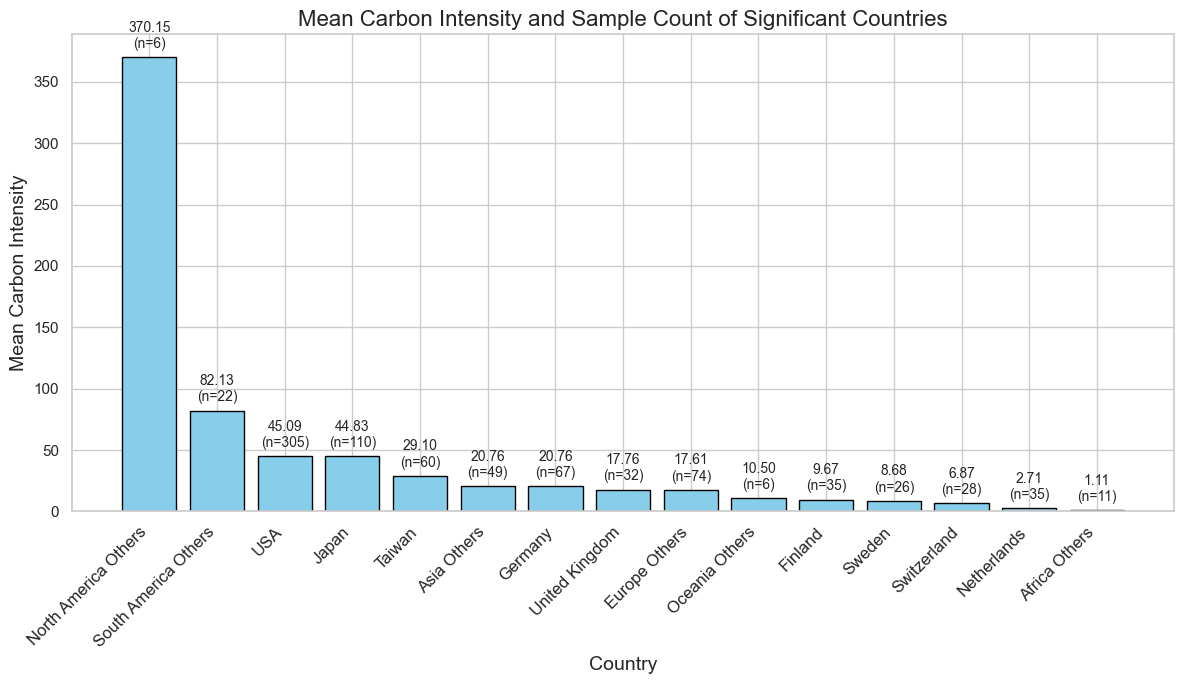

In [21]:
# Step 1: Filter significant results
significant_results = posthoc_results[posthoc_results['pval'] < 0.05]

# Step 2: Extract unique countries from significant comparisons
unique_countries = set(significant_results['A']).union(set(significant_results['B']))

# Step 3: Calculate means and counts for these countries
country_means = clean_data.groupby('Grouped_Country')['Carbon_intensity'].mean()
country_counts = clean_data.groupby('Grouped_Country')['Carbon_intensity'].count()

# Step 4: Filter and sort the means and counts for only the significant countries
significant_means = country_means[country_means.index.isin(unique_countries)].sort_values(ascending=False)
significant_counts = country_counts[significant_means.index]

# Step 5: Plot the means as a bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(significant_means.index, significant_means.values, color='skyblue', edgecolor='black')

# Add value labels to each bar
for bar, count in zip(bars, significant_counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text on the bar
        height + 5,  # Slightly above the bar
        f'{height:.2f}\n(n={count})',  # Format to include mean and count
        ha='center', va='bottom', fontsize=10
    )

# Add chart details
plt.title('Mean Carbon Intensity and Sample Count of Significant Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Mean Carbon Intensity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


### Key Findings and Limitations

#### Significant Differences Across Groups:
- **Welch’s ANOVA** confirmed that there are significant differences in *Carbon Intensity* between groups (p-value from ANOVA).
- The post-hoc analysis revealed specific pairwise differences, with **37 significant comparisons** (p < 0.05).

#### Groups with High Differences:
- **North America Others** stands out as a major outlier, consistently showing significantly higher *Carbon Intensity* compared to almost all other groups (e.g., Netherlands, Japan, Oceania Others).
- **USA, Japan, and Germany** also display relatively high *Carbon Intensity*, with significant differences compared to lower-intensity groups like **Netherlands, Switzerland, and Sweden**.
- Groups like **Africa Others, Oceania Others, and Switzerland** generally show low *Carbon Intensity* and are often significantly different from high-intensity groups.

---

### 2. Possible Reasons for the Differences

#### a. Industrialization Level and Energy Mix
- **North America Others and USA:**
  - Likely reflects high-carbon industries and reliance on fossil fuels for energy.
  - Large-scale industrial activities, including resource extraction and manufacturing, drive high emissions.
- **Europe Others, Netherlands, and Switzerland:**
  - Lower *Carbon Intensity* may result from cleaner energy sources (e.g., renewables, nuclear) and stringent environmental regulations.

#### b. Nature of Products
- High-intensity regions may focus on producing energy-intensive goods, such as heavy machinery, automobiles, or chemicals.
- Low-intensity regions may produce less energy-demanding goods, such as textiles or services.

#### c. Regulations and Sustainability Initiatives
- **Europe (e.g., Germany, Netherlands):**
  - Stringent regulations on emissions and higher adoption of energy-efficient technologies may lower *Carbon Intensity*.
- **Developing regions (e.g., Africa Others):**
  - Limited industrial activities and cleaner supply chains contribute to lower intensity but may also reflect lower economic output.

#### d. Economic Development Stage
- **Developed regions (e.g., USA, Japan):**
  - Higher industrial activity and energy demand, leading to higher emissions.
- **Developing regions (e.g., Africa Others):**
  - Fewer emissions due to limited industrialization.

---

### 3. Strategic Insights

#### Regions Requiring Attention:
- **North America Others, USA, and Japan** should be targeted for carbon reduction strategies, as they consistently show high *Carbon Intensity*.
- These regions may benefit from:
  - Transitioning to renewable energy.
  - Implementing stricter emissions standards.
  - Encouraging carbon offset programs.

#### Benchmarks for Low Emissions:
- Groups like **Netherlands, Switzerland, and Sweden** demonstrate significantly lower *Carbon Intensity* and could serve as benchmarks for sustainability practices.

---

### 4. Challenges in Interpretation

#### Aggregate Data:
- The analysis uses aggregate data per region, which may mask intra-regional variations (e.g., emissions vary across states or industries).
- The decision for one approach of grouping the countries may have an significant influence on the output. 

#### Underlying Factors Not Captured:
- Factors such as trade, raw material sourcing, and supply chain complexity are not directly analyzed but may influence *Carbon Intensity*.

---

### Overall Interpretation

#### Big Picture:
- The results confirm that *Carbon Intensity* varies significantly between regions, driven by differences in industrial activity, energy sources, and regulations.

#### Actionable Insights:
- High-emission groups like **North America Others** and **USA** require immediate intervention, while low-emission regions like **Switzerland** and **Netherlands** offer valuable models for sustainable practices.
```